<a href="https://colab.research.google.com/github/AlbertMdz/T-cnicas_Algor-tmicas/blob/master/SVM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

# **Quadratic Programming**

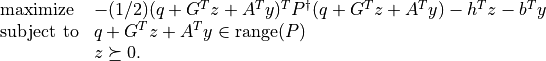

In [0]:
class SVM:
  
  def fit(self, X, y):
        n_samples, n_features = X.shape# P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
                P = cvxopt.matrix(np.outer(y, y) * K)# q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)# A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))# b = 0 
        b = cvxopt.matrix(0.0)# -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))# 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        #*******************************************************************************
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)# Lagrange multipliers
        #*******************************************************************************
        a = np.ravel(solution['x'])# Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]# Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)# Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        
  def project(self, X):
      return np.dot(X, self.w) + self.b
    
    
  def predict(self, X):
      return np.sign(self.project(X))

In [0]:
X, y = make_blobs(n_samples=2000, centers=2, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

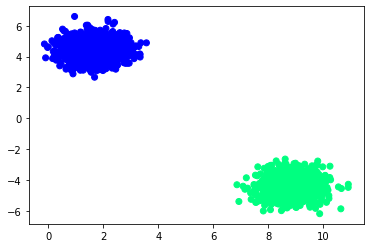

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
svm = SVM()

svm.fit(X_train, y_train)

In [0]:
svm.a

array([0.05886608, 0.05886657])

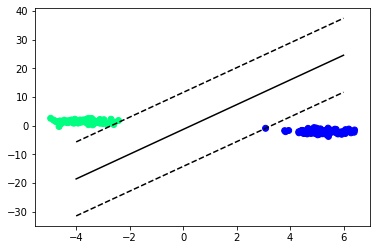

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 6; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 6; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 6; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [0]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 0, 37]])

#**Ejemplo 5** (Diapositivas de la clase)

In [0]:
X = np.array([(-1,-1),(1,-1),(-1,1),(1,1)])
y = np.array([-1,-1,-1,1])
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

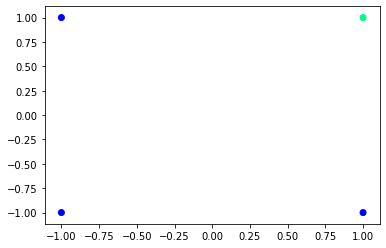

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [0]:
X_train = X
y_train = y

In [0]:
svm = SVM()

svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.2400e+00 -2.5400e+00  8e+00  3e+00  2e+00
 1: -6.4388e-01 -1.9930e+00  1e+00  4e-16  5e-16
 2: -9.6827e-01 -1.0492e+00  8e-02  6e-17  4e-16
 3: -9.9962e-01 -1.0005e+00  9e-04  4e-16  2e-16
 4: -1.0000e+00 -1.0000e+00  9e-06  2e-16  5e-16
 5: -1.0000e+00 -1.0000e+00  9e-08  2e-16  3e-16
Optimal solution found.


In [0]:
svm.a

array([0.49999999, 0.49999999, 1.00000001])

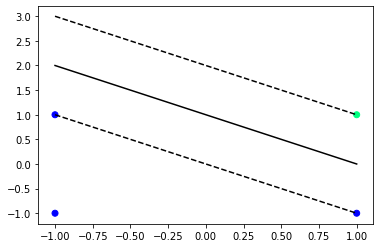

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -1; a1 = f(a0, svm.w, svm.b)
b0 = 1; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -1; a1 = f(a0, svm.w, svm.b, 1)
b0 = 1; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -1; a1 = f(a0, svm.w, svm.b, -1)
b0 = 1; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')